# MVP Análise de Dados e Boas Práticas
Curso: Pós Graduação Ciência de Dados e Analitycs- PUC - RJ

**Nome:** Aluno: Douglas da Silva Lima - 06.2025


**Dataset:** [Base TSE-RJ](https://github.com/DougRio/MVP2/raw/main/perfil_comparecimento_abstencao_2024_RJ.csv.zi)


# Requisitos do MVP:
https://pucrio.grupoa.education/plataforma/course/1729360/content/37825727

Resumo: Identificar um dataset e trabalhar desde a definição do problema até a etapa de pré-processamento de dados, conforme esquema visto na disciplina Análise exploratória e pré-processamento de dados.
Produza um notebook no Google Colab, utilize a linguagem Python e bibliotecas que considera apropriadas para abordar o problema.
Crie o notebook seguindo as boas práticas de codificação vistas no curso.



```
# Isto está formatado como código
```

# Descrição do Problema

O conjunto de dados Base TSE-RJ (Tribunal Superior Eleitoral) é um conjunto de dados relativo as eleições municipais do ano de 2024 no estado do Rio de Janeiro. Esta base apresenta dados de comparecimento e abstenção de eleitores para todos os municipios do estado em suas respectivas zonas e seções eleitorais.

Considerando que todos os cidadões são obrigados a votarem, com exceção das pessoas acima de 70 anos que podem votar; porém não obrigatório, penso que não comparecer pode estar relacionado com alguns fatores registrados no dataset como: **Faixa etária ou Escolaridade do eleitor ou genero ou raça ou até mesmo eleitores que solicitaram mudança de domicílio eleitoral.**

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Existe uma correlação entre **faixa etaria do eleitor** com quantidade de abstenções?

- Existe uma correlação entre o** nivel de escolaridade do eleitor** com quantidade de abstenções?

- Existe uma correlação entre eleitores que **mudam de domicilio eleitoral** com quantidade de abstenções?

A ídeia é procurar alguma correlação com os eleitores que não compareceram no dia da eleição com algum dos outros atributos registrados.

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (Escolaridade, Faixa Etaria e Abstencoes), o objetivo é prever qual das caracteristicas tem maior relacao com a abstencao dos eleitores.
******

## Seleção de Dados

O dataset base de dados TSE é um conjunto de dados amplamente disponível, porém pôr ser tratar de dados de um evento real de um número elevado de registros, talvez seja necessário uma etapa de seleção de dados externa, pois o dataset não indica estar acurado. Para efeitos desta trabalho acadêmico utilizarei apenas registros do Municipio do RJ, uma vez que este é o municipio com maior quantidade de eleitores em todo o Estado do Rio de Janeiro.

## Atributos do Dataset

O dataset contém 520.005 amostras, com 23 instâncias de faixa etária do eleitores. Possui 43 atributos:

As faixas etárias identificadas se iniciam em: 16 anos e terminam em 100 anos e estão coletados na coluna DS_FAIXA_ETARIA.

Para Escolaridade , 8 diferentes faixas sao descritas no dicionario de metadados.

Os 43 atributos estão detalhados no arquivo Dicionario_dados.pdf carregado no Github localizado em https://github.com/DougRio/MVP2/blob/main/Dicionario_dados.pdf


# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Base TSE-RJ

In [1]:
# Import de bibliotecas
import requests
import io
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# URL direta para o conteúdo bruto do arquivo zip localizado dentro do Github.
# O arquivo foi carregado no GitHub
zip_url = "https://github.com/DougRio/MVP2/raw/main/perfil_comparecimento_abstencao_2024_RJ.csv.zip"
response = requests.get(zip_url)
response.raise_for_status() # Lança uma exceção para erros de requisição (404, 500, etc.)

In [3]:
# Lista os arquivos dentro do zip apenas para conferencia
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Confirmando o arquivo CSV esta dentro do Zip
        print("Arquivos no zip:", z.namelist())

Arquivos no zip: ['perfil_comparecimento_abstencao_2024_RJ.csv', '__MACOSX/._perfil_comparecimento_abstencao_2024_RJ.csv']


In [4]:
#verifica integridade do CSV e carrega em um dataframe
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    for filename in zip_ref.namelist():
        # Verifica se o arquivo dentro do ZIP é um CSV ou TXT (ou outro formato)
        if filename.endswith(".csv") or filename.endswith(".txt"):
            # Lê o arquivo dentro do ZIP
            with zip_ref.open(filename) as f:
                # Define a codificação (utf-8)(latin-1)(ISO-8859-1) ,
                try:
                    df = pd.read_csv(f, sep=';', encoding="ISO-8859-1")

                except UnicodeDecodeError:
                    df = pd.read_csv(f, sep=';', encoding="ISO-8859-1")

                break # Carrega apenas o primeiro arquivo CSV ou TXT

In [5]:
# Confirmando primeiras linhas carregadas dentro do dataframe geral contendo todos os municipios disponibilizados no CSV da base de dados
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE,QT_COMPAREC_FACULTATIVO,QT_ABST_FACULTATIVO,QT_COMPAREC_OBRIGATORIO,QT_ABST_OBRIGATORIO,QT_COMPAREC_DEFIC_FACULTATIVO,QT_ABST_DEFIC_FACULTATIVO,QT_COMPAREC_DEFIC_OBRIGATORIO,QT_ABST_DEFIC_OBRIGATORIO
0,29/04/2025,16:22:43,2024,1,RJ,58009,QUISSAMÃ,255,2,MASCULINO,...,0,0,2,0,0,0,0,0,0,0
1,29/04/2025,16:22:43,2024,1,RJ,58009,QUISSAMÃ,255,2,MASCULINO,...,0,0,2,0,0,0,1,0,0,0
2,29/04/2025,16:22:43,2024,1,RJ,58009,QUISSAMÃ,255,2,MASCULINO,...,0,0,2,1,0,0,0,0,0,0
3,29/04/2025,16:22:43,2024,1,RJ,58009,QUISSAMÃ,255,2,MASCULINO,...,0,0,1,0,0,0,0,0,0,0
4,29/04/2025,16:22:43,2024,1,RJ,58009,QUISSAMÃ,255,2,MASCULINO,...,0,0,1,0,0,0,0,0,0,0


In [6]:
#Criando um novo dataframe apenas com os registros de votação do municipio do Rio de Janeiro, uma vez que o dataframe anterior contemplava todos os municipios
# e para efeitos deste trabalhos so queremos Municipio do RJ
df_rj = df[df['NM_MUNICIPIO'] == 'RIO DE JANEIRO'].copy()
df_rj.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE,QT_COMPAREC_FACULTATIVO,QT_ABST_FACULTATIVO,QT_COMPAREC_OBRIGATORIO,QT_ABST_OBRIGATORIO,QT_COMPAREC_DEFIC_FACULTATIVO,QT_ABST_DEFIC_FACULTATIVO,QT_COMPAREC_DEFIC_OBRIGATORIO,QT_ABST_DEFIC_OBRIGATORIO
219244,29/04/2025,16:22:43,2024,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,0,0,0,1,0,0,0,0,0,0
219245,29/04/2025,16:22:43,2024,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,0,0,0,1,0,0,0,0,0,0
219246,29/04/2025,16:22:43,2024,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,0,0,0,1,0,0,0,0,0,0
219247,29/04/2025,16:22:43,2024,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,0,0,0,0,1,0,0,0,0,0
219248,29/04/2025,16:22:43,2024,1,RJ,60011,RIO DE JANEIRO,4,0,NÃO INFORMADO,...,0,0,1,0,0,0,0,0,0,0


In [7]:
# Verificando o total de abstenções totalizadas no novo dataset (df_rj)
total_abstencao_rj = df_rj['QT_ABSTENCAO'].sum()
print(f"Total de abstenções no município do RJ: {total_abstencao_rj}")


Total de abstenções no município do RJ: 1532099


In [8]:
#Gerando dataframe apenas com registros de Abstencões
df_rj_abstencoes = df_rj[df_rj['QT_ABSTENCAO'] != 0].copy()

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Base de dados TSE, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O novo dataset **Base RJ-TSE (df_rj_abstencoes)** possui 87.178 instâncias (observações), com 23 instâncias de faixa etaria do eleitor. O dataset possui 43 colunas. A grande maioria (29 colunas) das características de medição são de tipo numérico **(int64**), enquanto o dataset apresenta ainda alguns do atributos do tipo **"object".** (14 colunas) assim como o dataset original já descrito acima.

In [9]:
print(f"Total de instâncias para o Municipio do Rio de Janeiro: {len(df_rj_abstencoes)}")
print("\nTipos de dados por coluna:")
print(df_rj_abstencoes.info())

Total de instâncias para o Municipio do Rio de Janeiro: 87178

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
Index: 87178 entries, 219244 to 500789
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DT_GERACAO                     87178 non-null  object
 1   HH_GERACAO                     87178 non-null  object
 2   ANO_ELEICAO                    87178 non-null  int64 
 3   NR_TURNO                       87178 non-null  int64 
 4   SG_UF                          87178 non-null  object
 5   CD_MUNICIPIO                   87178 non-null  int64 
 6   NM_MUNICIPIO                   87178 non-null  object
 7   NR_ZONA                        87178 non-null  int64 
 8   CD_GENERO                      87178 non-null  int64 
 9   DS_GENERO                      87178 non-null  object
 10  CD_ESTADO_CIVIL                87178 non-null  int64 
 11  DS_ESTADO_CIVIL             

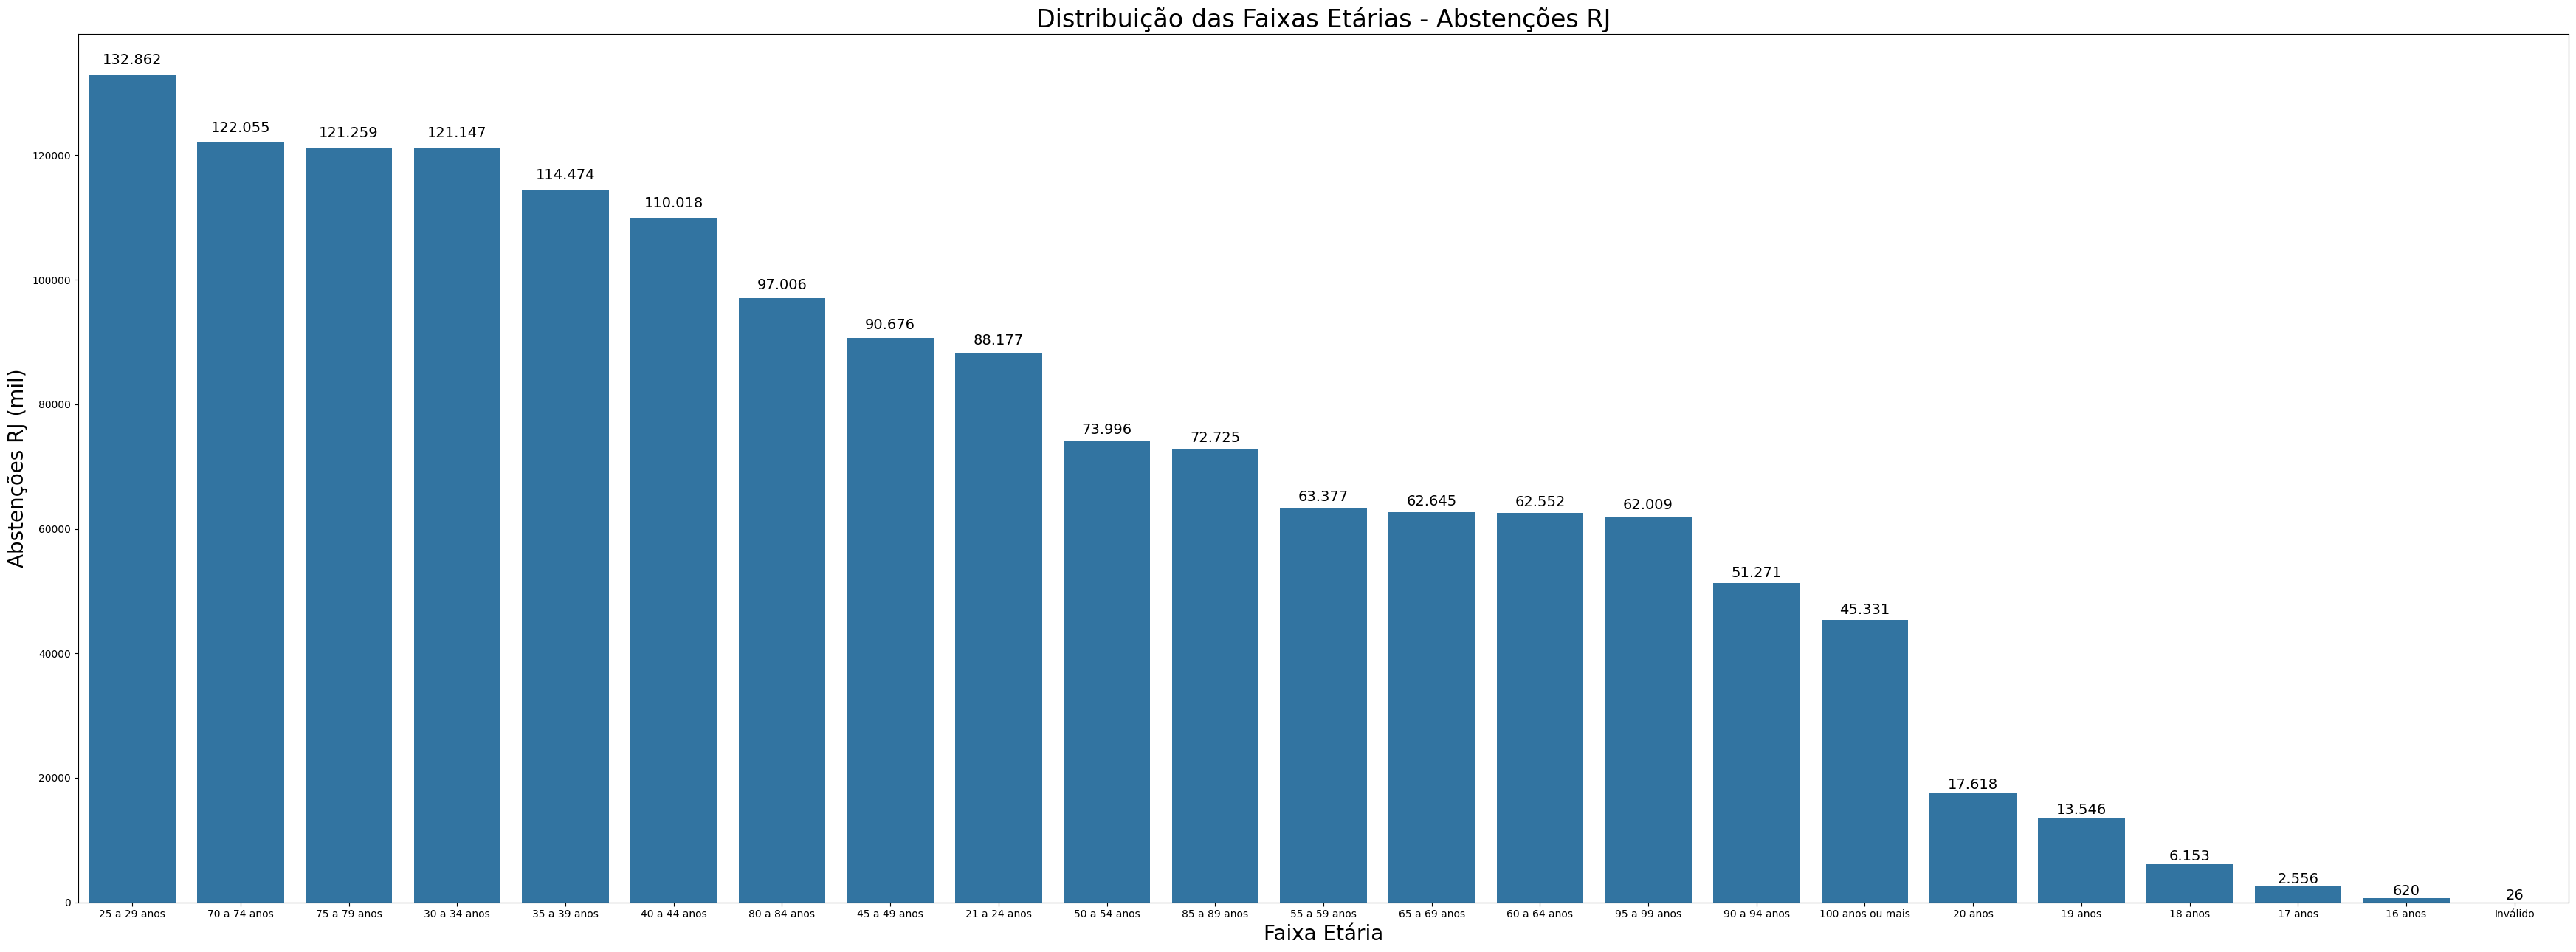

In [24]:
# gráfico de barras
# Distribuição da faixa etária por quantidade de observações (abstencoes)

# Agrupa e soma abstenções por faixa etária
df_soma = df_rj_abstencoes.groupby('DS_FAIXA_ETARIA')['QT_ABSTENCAO'].sum().reset_index()

# Ordena por soma decrescente
df_soma = df_soma.sort_values(by='QT_ABSTENCAO', ascending=False)

# Extrai a ordem das faixas etárias
ordem_faixas = df_soma['DS_FAIXA_ETARIA'].tolist()

# Figura e gráfico de barras ordenado
fig, ax = plt.subplots(figsize=(35, 13))

sns.barplot(
    x='DS_FAIXA_ETARIA',
    y='QT_ABSTENCAO',
    data=df_rj_abstencoes,
    estimator=sum,
    errorbar=None,
    order=ordem_faixas,
    ax=ax
)

ax.set_title('Distribuição das Faixas Etárias - Abstenções RJ', fontsize=24)
ax.set_xlabel('Faixa Etária', fontsize=20)
ax.set_ylabel('Abstenções RJ (mil)', fontsize=20)

for p in ax.patches:
    altura = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        altura + (altura * 0.01),
        f'{int(altura):,}'.replace(',', '.'),
        ha='center', va='bottom', fontsize=14
    )

plt.tight_layout()
plt.show()


No Gráfico acima podemos observar a quantidade de observações para cada faixa etária e nota-se que existe uma instancia denominada "Invalido" (faixa etária) com 26 registros. No arquivo de metadados não há nenhuma informação sobre esta instância e desta forma podemos inferir que é uma informação erradamente mapeada.
O gráfico de barras mostra que cada instancia possui diferentes quantidades de amostras, confirmando que o dataset é desbalanceado em termos de classes.

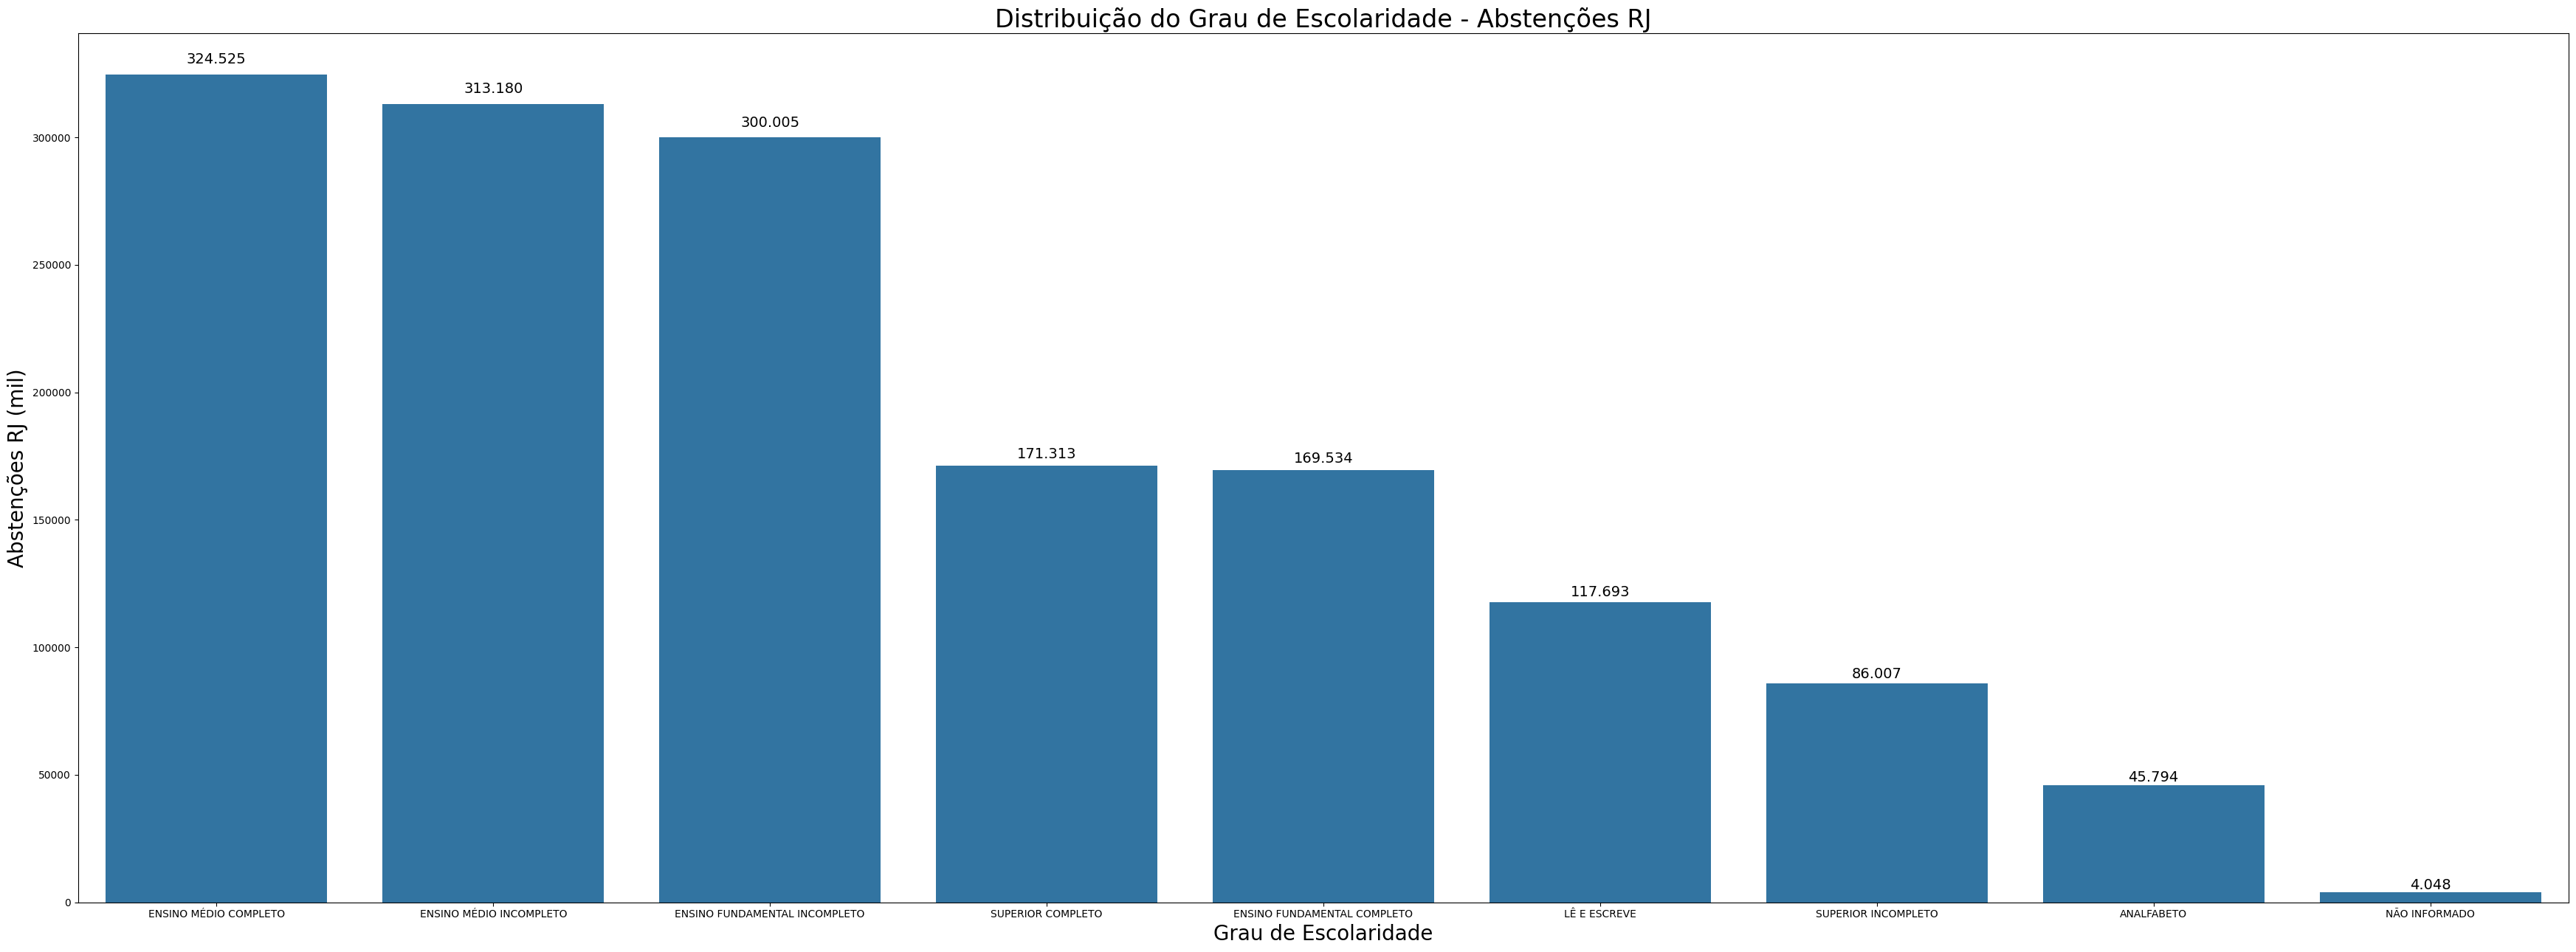

In [25]:
# gráfico de barras
# Distribuição do Grau de Escolaridade por quantidade de observações (abstencoes)
# Prepara a figura (fig) e a área do gráfico (ax) com largura 35 e altura 13 (em polegadas)

# Agrupa e soma abstenções por Grau de Escolaridade
df_soma = df_rj_abstencoes.groupby('DS_GRAU_ESCOLARIDADE')['QT_ABSTENCAO'].sum().reset_index()

# Ordena por soma decrescente
df_soma = df_soma.sort_values(by='QT_ABSTENCAO', ascending=False)

# Extrai a ordem do Grau de Escolaridade
ordem_faixas = df_soma['DS_GRAU_ESCOLARIDADE'].tolist()

# Figura e gráfico de barras ordenado
fig, ax = plt.subplots(figsize=(35, 13))

sns.barplot(
    x='DS_GRAU_ESCOLARIDADE',
    y='QT_ABSTENCAO',
    data=df_rj_abstencoes,
    estimator=sum,
    errorbar=None,
    order=ordem_faixas,
    ax=ax
)

ax.set_title('Distribuição do Grau de Escolaridade - Abstenções RJ', fontsize=24)
ax.set_xlabel('Grau de Escolaridade', fontsize=20)
ax.set_ylabel('Abstenções RJ (mil)', fontsize=20)

for p in ax.patches:
    altura = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        altura + (altura * 0.01),
        f'{int(altura):,}'.replace(',', '.'),
        ha='center', va='bottom', fontsize=14
    )

plt.tight_layout()
plt.show()

No Gráfico acima podemos observar a quantidade de observacoes para cada faixa de Escolaridade (total de 8, conforme listado no arquivo de metadados) e nota-se que existe uma instancia denominada "NAO INFORMADO" com 4048 amostras de abstencões. No arquivo de metadados não há nenhuma informação sobre esta instância e desta forma podemos inferir que é uma informação erradamente mapeada. O gráfico de barras mostra que cada instancia possui diferentes quantidades de amostras.
A escolaridade ENSINO MEDIO COMPLETO e onde tem maior ocorrencia de abstencoes.

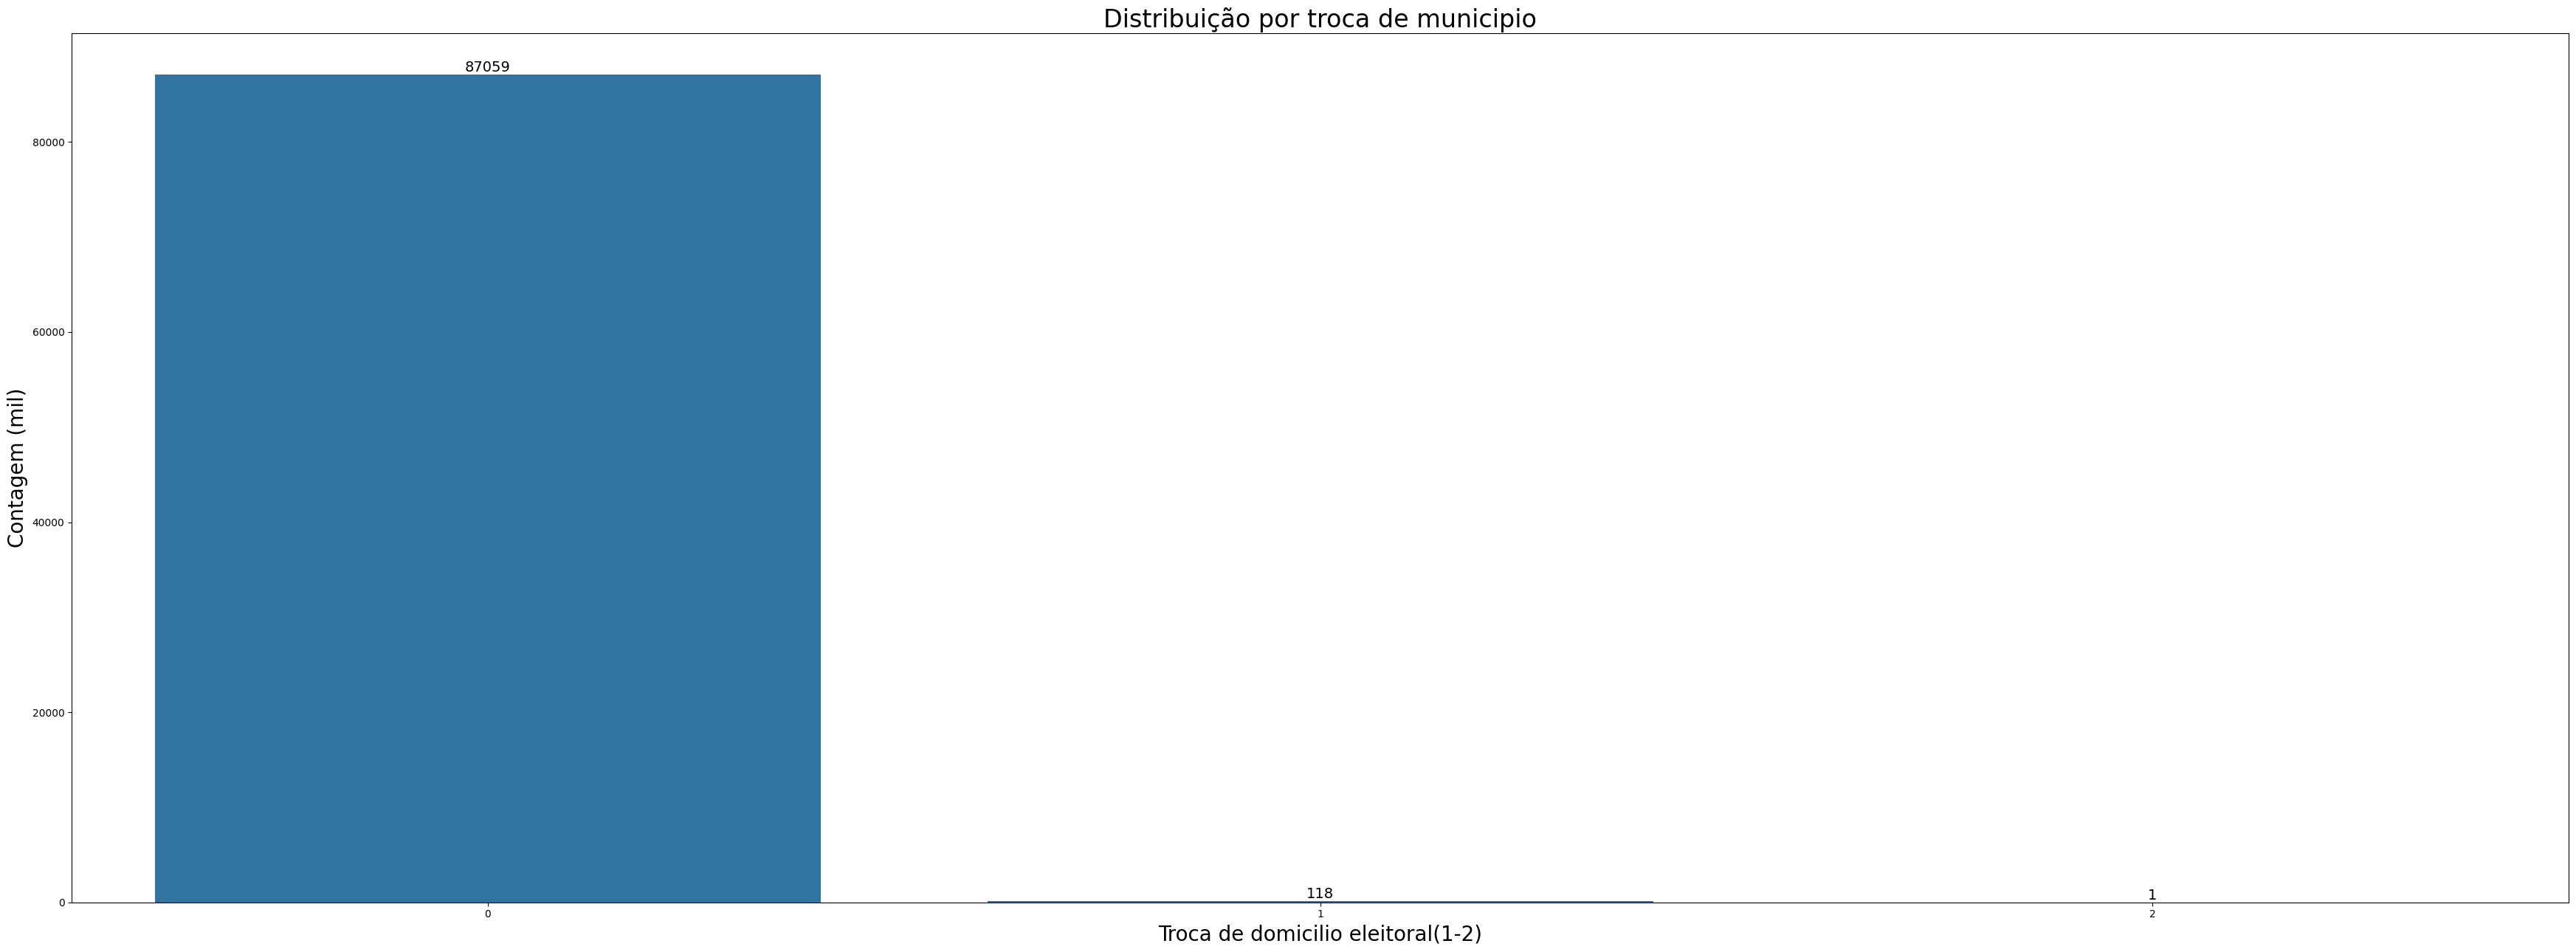

In [28]:
# gráfico de barras simples
# Distribuição do eleitores que fizeram trocar de domicilio eleitoral por quantidade de observações
# Prepara a figura (fig) e a área do gráfico (ax) com largura 35 e altura 13 (em polegadas)
fig, ax = plt.subplots(figsize = (35, 13))

# Gráfico de barras
ax = sns.countplot(x='QT_ABSTENCAO_TTE', data=df_rj_abstencoes)

# Título e rótulos
plt.title('Distribuição por troca de municipio',fontsize=24)
plt.xlabel('Troca de domicilio eleitoral(1-2)',fontsize=20)
plt.ylabel('Contagem (mil)',fontsize=20)

# Adiciona os valores nas barras
for p in ax.patches:
    altura = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # posição x centralizada
        altura + 5,                      # posição y um pouco acima da barra
        f'{int(altura)}',                # texto formatado como inteiro
        ha='center', va='bottom', fontsize=14  # alinhamento e estilo
    )

plt.tight_layout()
plt.show()

Com relacão a eleitores que fizeram solicitação de troca de domicilio  categorizado pelos valores 1 e 2 no eixo X, nota-se que não há uma grande incidência de abstenções para esse grupo de eleitores. Temos 119 eleitores que nao votaram do grupo de pessoas que fizeram troca de domicilio.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [29]:
# estatísticas descritivas básicas do dataset
df_rj_abstencoes.describe()

,ANO_ELEICAO,NR_TURNO,CD_MUNICIPIO,NR_ZONA,CD_GENERO,CD_ESTADO_CIVIL,CD_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,CD_COR_RACA,CD_QUILOMBOLA,...,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE,QT_COMPAREC_FACULTATIVO,QT_ABST_FACULTATIVO,QT_COMPAREC_OBRIGATORIO,QT_ABST_OBRIGATORIO,QT_COMPAREC_DEFIC_FACULTATIVO,QT_ABST_DEFIC_FACULTATIVO,QT_COMPAREC_DEFIC_OBRIGATORIO,QT_ABST_DEFIC_OBRIGATORIO
count,87178.0,87178.0,87178.0,87178.000000,87178.000000,87178.000000,87178.000000,87178.000000,87178.000000,87178.000000,...,87178.000000,87178.000000,87178.000000,87178.000000,87178.000000,87178.000000,87178.000000,87178.000000,87178.000000,87178.000000
mean,2024.0,1.0,60011.0,139.965760,2.984101,3.203457,5408.988610,4.694636,0.253917,0.231641,...,0.062642,0.001376,2.786070,6.791828,35.730723,10.782548,0.050804,0.110188,0.162931,0.066714
std,0.0,0.0,0.0,87.034487,1.080046,2.804794,2540.153642,2.132391,1.615419,1.475380,...,0.425574,0.037384,19.311425,25.676480,139.350496,46.384190,0.421771,0.563663,0.690953,0.319768
min,2024.0,1.0,60011.0,4.000000,0.000000,0.000000,-3.000000,0.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.0,1.0,60011.0,24.000000,2.000000,1.000000,3034.000000,3.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024.0,1.0,60011.0,170.000000,4.000000,3.000000,5559.000000,5.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2024.0,1.0,60011.0,216.000000,4.000000,5.000000,7579.000000,6.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,2.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,2024.0,1.0,60011.0,246.000000,4.000000,9.000000,9999.000000,8.000000,5.000000,2.000000,...,16.000000,2.000000,1148.000000,570.000000,2728.000000,1411.000000,25.000000,22.000000,24.000000,9.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [30]:
# média dos atributos numéricos do dataset
df_rj_abstencoes.describe().loc['mean']

,mean
ANO_ELEICAO,2024.000000
NR_TURNO,1.000000
CD_MUNICIPIO,60011.000000
NR_ZONA,139.965760
CD_GENERO,2.984101
CD_ESTADO_CIVIL,3.203457
CD_FAIXA_ETARIA,5408.988610
CD_GRAU_ESCOLARIDADE,4.694636
CD_COR_RACA,0.253917
CD_QUILOMBOLA,0.231641


In [31]:
# Qual gráfico seria interessante usar pra mostrar a média?

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [32]:
# desvio padrão dos atributos numéricos do dataset
df_rj_abstencoes.describe().loc['std']

,std
ANO_ELEICAO,0.000000
NR_TURNO,0.000000
CD_MUNICIPIO,0.000000
NR_ZONA,87.034487
CD_GENERO,1.080046
CD_ESTADO_CIVIL,2.804794
CD_FAIXA_ETARIA,2540.153642
CD_GRAU_ESCOLARIDADE,2.132391
CD_COR_RACA,1.615419
CD_QUILOMBOLA,1.475380


In [33]:
# Qual gráfico seria interessante usar pra mostrar o desvio padrão?

# Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

# Quantidade de Abstenções


In [44]:
# Agrupar por faixa etária e somar as abstenções
df_rj_abstencoes = df.groupby('DS_FAIXA_ETARIA', as_index=False)['QT_ABSTENCAO'].sum()

# Renomear as colunas conforme desejado
df_rj_abstencoes.rename(columns={
    'QT_ABSTENCAO': 'Abstencao',
    'DS_FAIXA_ETARIA': 'Faixa_etaria'
}, inplace=True)

# Ordenar pela quantidade de abstenções em ordem decrescente
df_rj_abstencoes =df_rj_abstencoes.sort_values(by='Faixa_etaria', ascending=True)

# Exibir o resultado
print(df_rj_abstencoes)


        Faixa_etaria  Abstencao
0   100 anos ou mais      79651
1            16 anos       2227
2            17 anos       7207
3            18 anos      15795
4            19 anos      33145
5            20 anos      43552
6       21 a 24 anos     221540
7       25 a 29 anos     338435
8       30 a 34 anos     309111
9       35 a 39 anos     287221
10      40 a 44 anos     274784
11      45 a 49 anos     227318
12      50 a 54 anos     185018
13      55 a 59 anos     162863
14      60 a 64 anos     154621
15      65 a 69 anos     151990
16      70 a 74 anos     275942
17      75 a 79 anos     275581
18      80 a 84 anos     216664
19      85 a 89 anos     152680
20      90 a 94 anos     101244
21      95 a 99 anos     111044
22          Inválido         61


Observa-se que nas faixas de idade mais novas de 16 ate 18, cujo muitos estao votando pela 1a vez, o registro de abstencoes é bem baixo, talvez pela motivação do 1o voto.
Outra observação seria para a faixa de 100 anos ou mais, onde acredito que seja eleitores aptos e que por razoes naturais nao comparecem, mas estao com titulo ativo no TSE. O mesmo raciocinio se aplica para as faixas acima de 70 anos. Lembrando que estas faixas nao sao obrigadas a votarem.

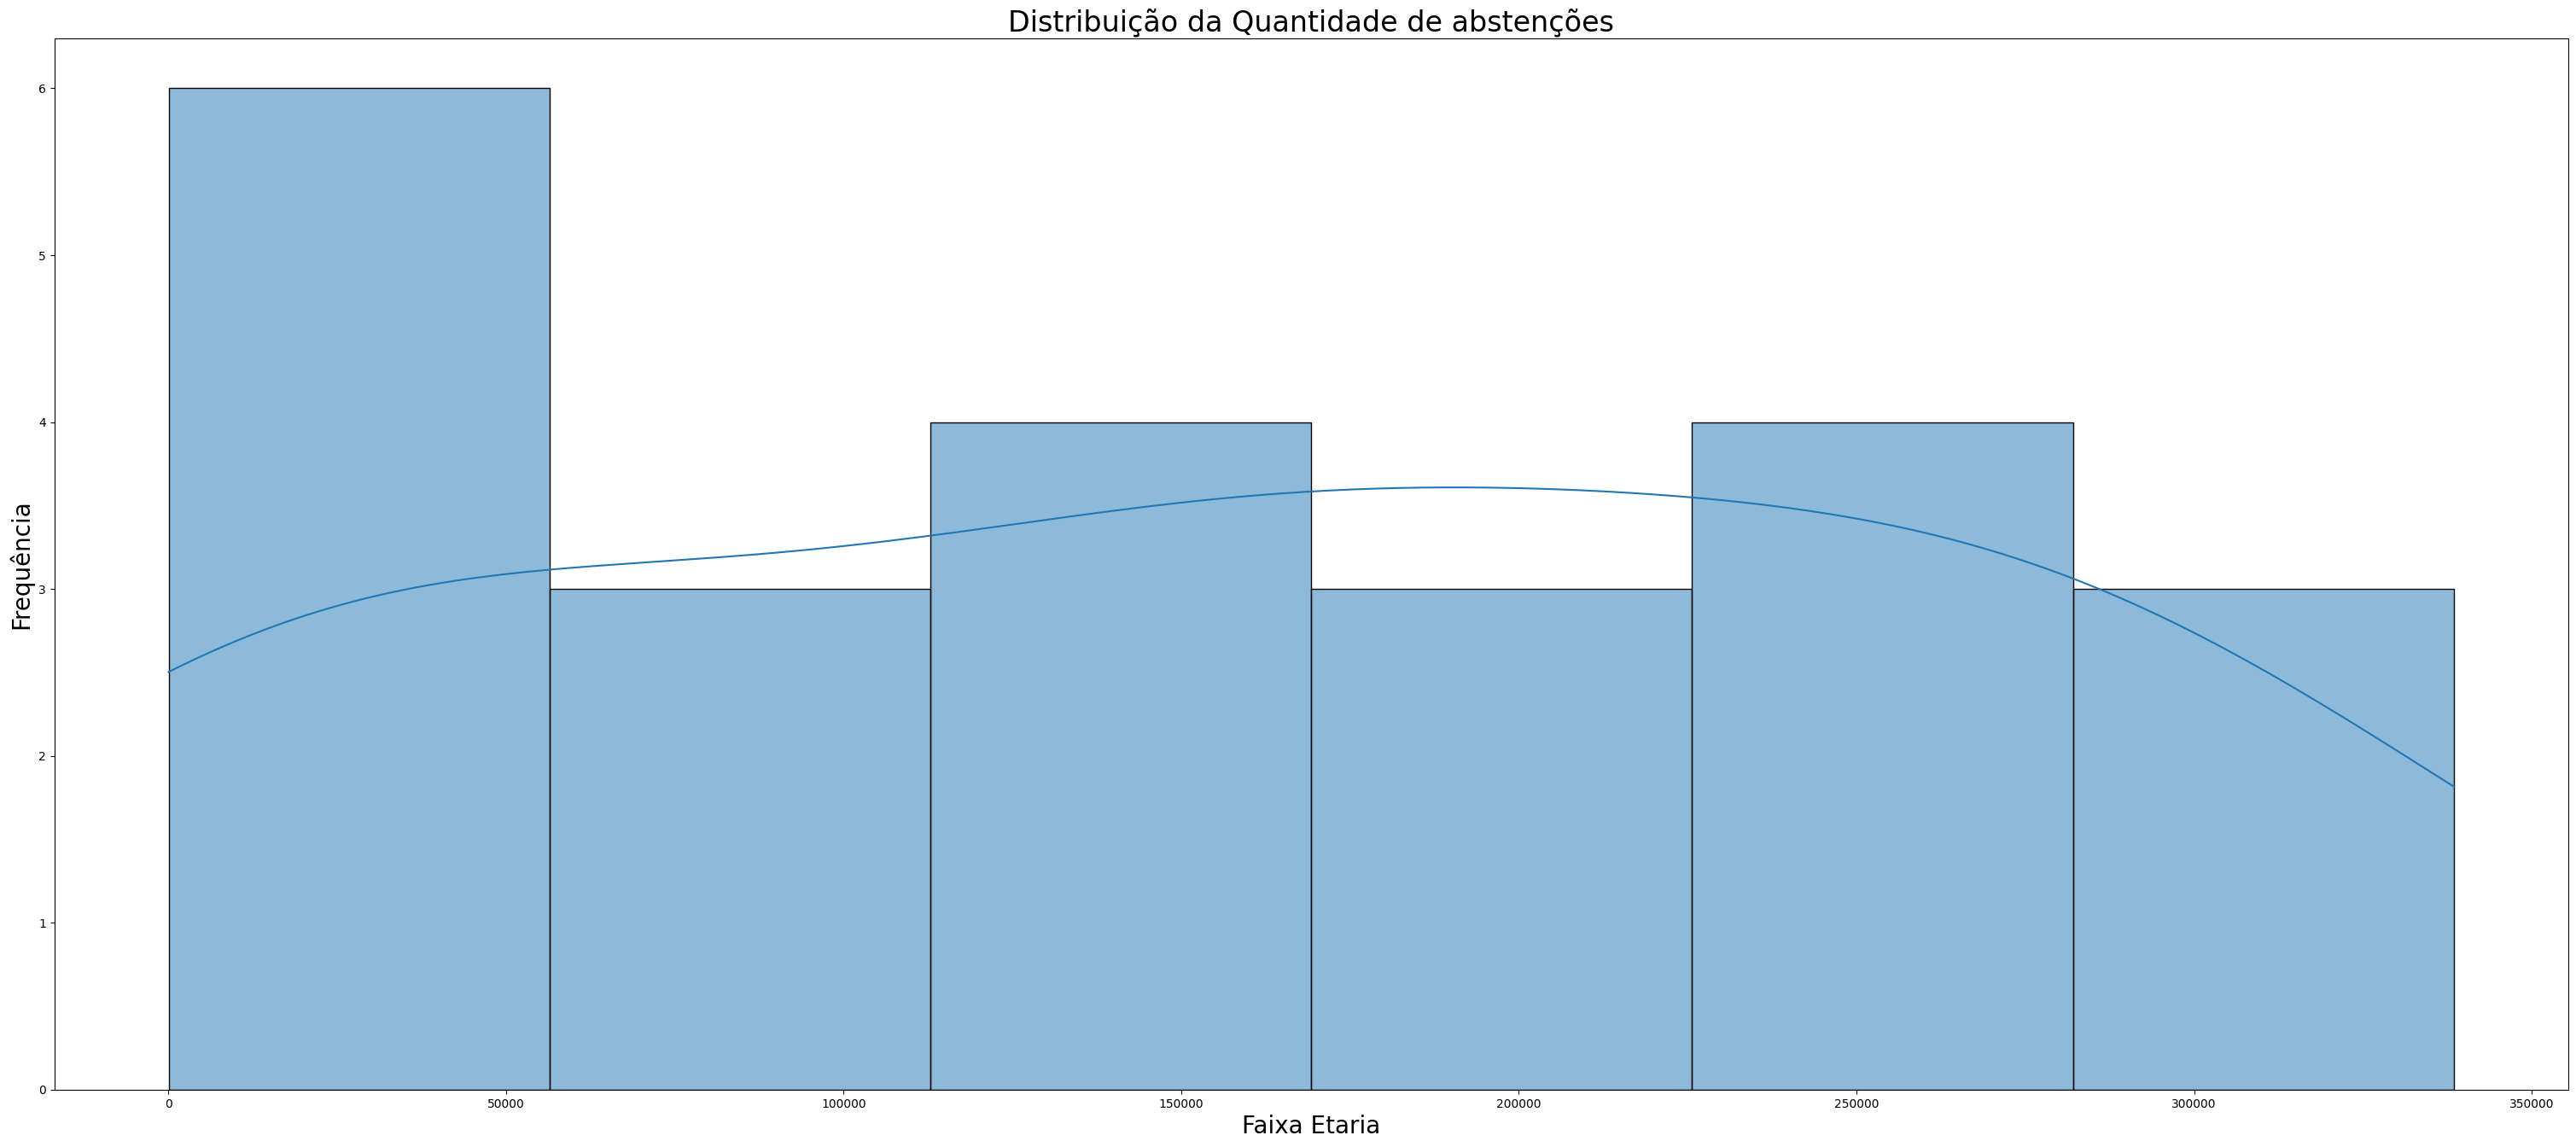

In [45]:
plt.figure(figsize=(38, 16))
# Histograma do Total de Abstencões (um dos atributos)
sns.histplot(df_rj_abstencoes['Abstencao'], kde=True)
plt.title('Distribuição da Quantidade de abstenções',fontsize=24)
plt.xlabel('Faixa Etaria', fontsize=20)
plt.ylabel('Frequência',fontsize=20)
plt.show()

O histograma mostra a distribuição do comprimento da faixa de abstençcão. A curva de densidade estimada (KDE) nos indica que a distribuição parece bimodal ou multimodal.

### *Faixa Etária*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

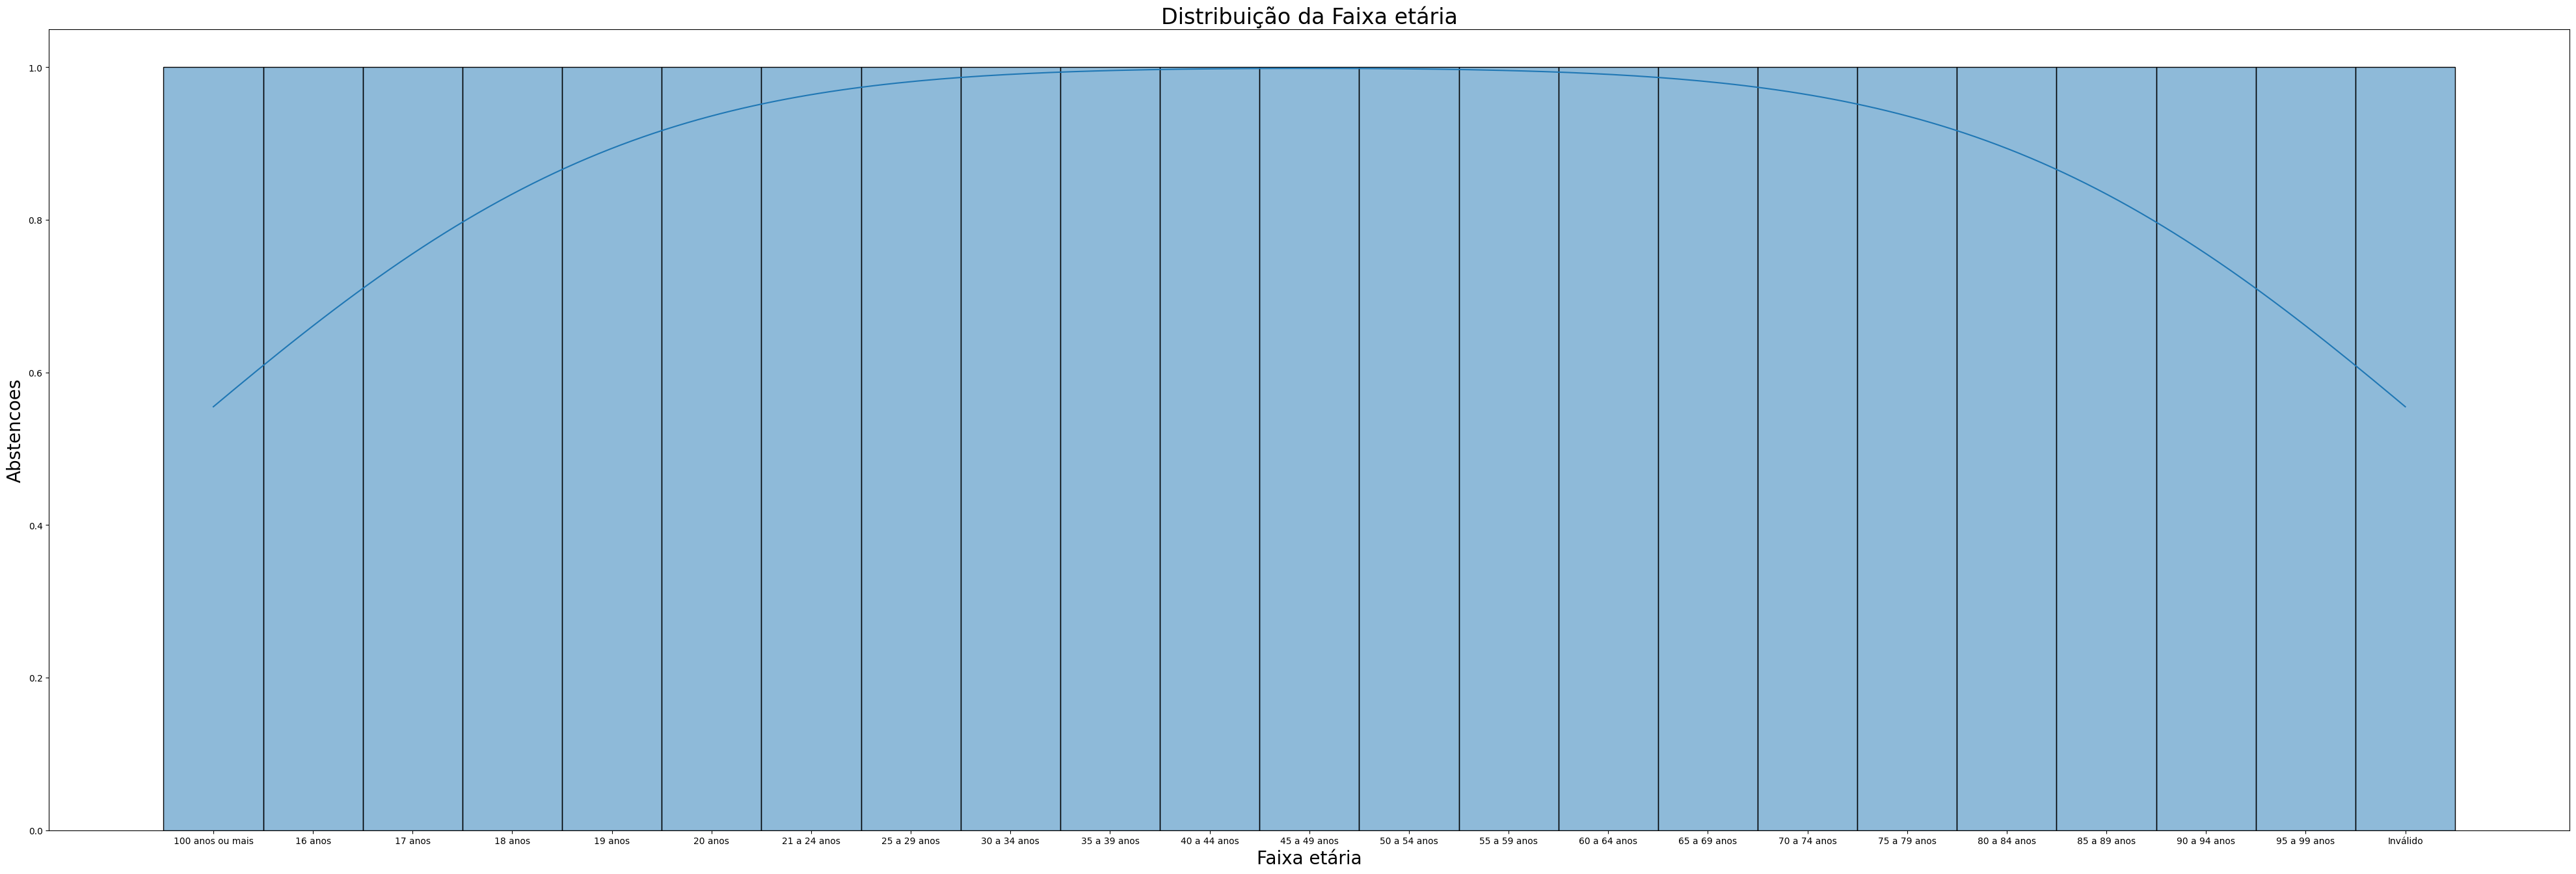

In [46]:
plt.figure(figsize=(50, 16))
# Histograma da Faixa etária (um dos atributos)
sns.histplot(df_rj_abstencoes['Faixa_etaria'], kde=True)
plt.title('Distribuição da Faixa etária',fontsize=24)
plt.xlabel('Faixa etária',fontsize=20)
plt.ylabel('Abstencoes',fontsize=20)
plt.show()

# Escolaridade

In [51]:
# Agrupar por faixa etária e somar as abstenções
df_rj_abstencoes = df.groupby('DS_GRAU_ESCOLARIDADE', as_index=False)['QT_ABSTENCAO'].sum()

# Renomear as colunas conforme desejado
df_rj_abstencoes.rename(columns={
    'QT_ABSTENCAO': 'Abstencao',
    'DS_GRAU_ESCOLARIDADE': 'Grau_escolaridade'
}, inplace=True)

# Ordenar pela quantidade de abstenções em ordem decrescente
df_rj_abstencoes =df_rj_abstencoes.sort_values(by='Abstencao', ascending=False)

# Exibir o resultado
print(df_rj_abstencoes)

               Grau_escolaridade  Abstencao
2  ENSINO FUNDAMENTAL INCOMPLETO     845868
3          ENSINO MÉDIO COMPLETO     747690
4        ENSINO MÉDIO INCOMPLETO     686996
1    ENSINO FUNDAMENTAL COMPLETO     337391
5                   LÊ E ESCREVE     330100
7              SUPERIOR COMPLETO     326587
8            SUPERIOR INCOMPLETO     184431
0                     ANALFABETO     160835
6                  NÃO INFORMADO       7796


Observa-se acima que eleitores com nivel de escolaridade menor (analfabeto) mostra-se com menor incidencia de abstencao. Por outro lado as maiores quantidades de abstencoes sao notadas para Eleitores com Ensino Fundamental Incompleto. "Nao informado" nao tem relevancia nesta analise.

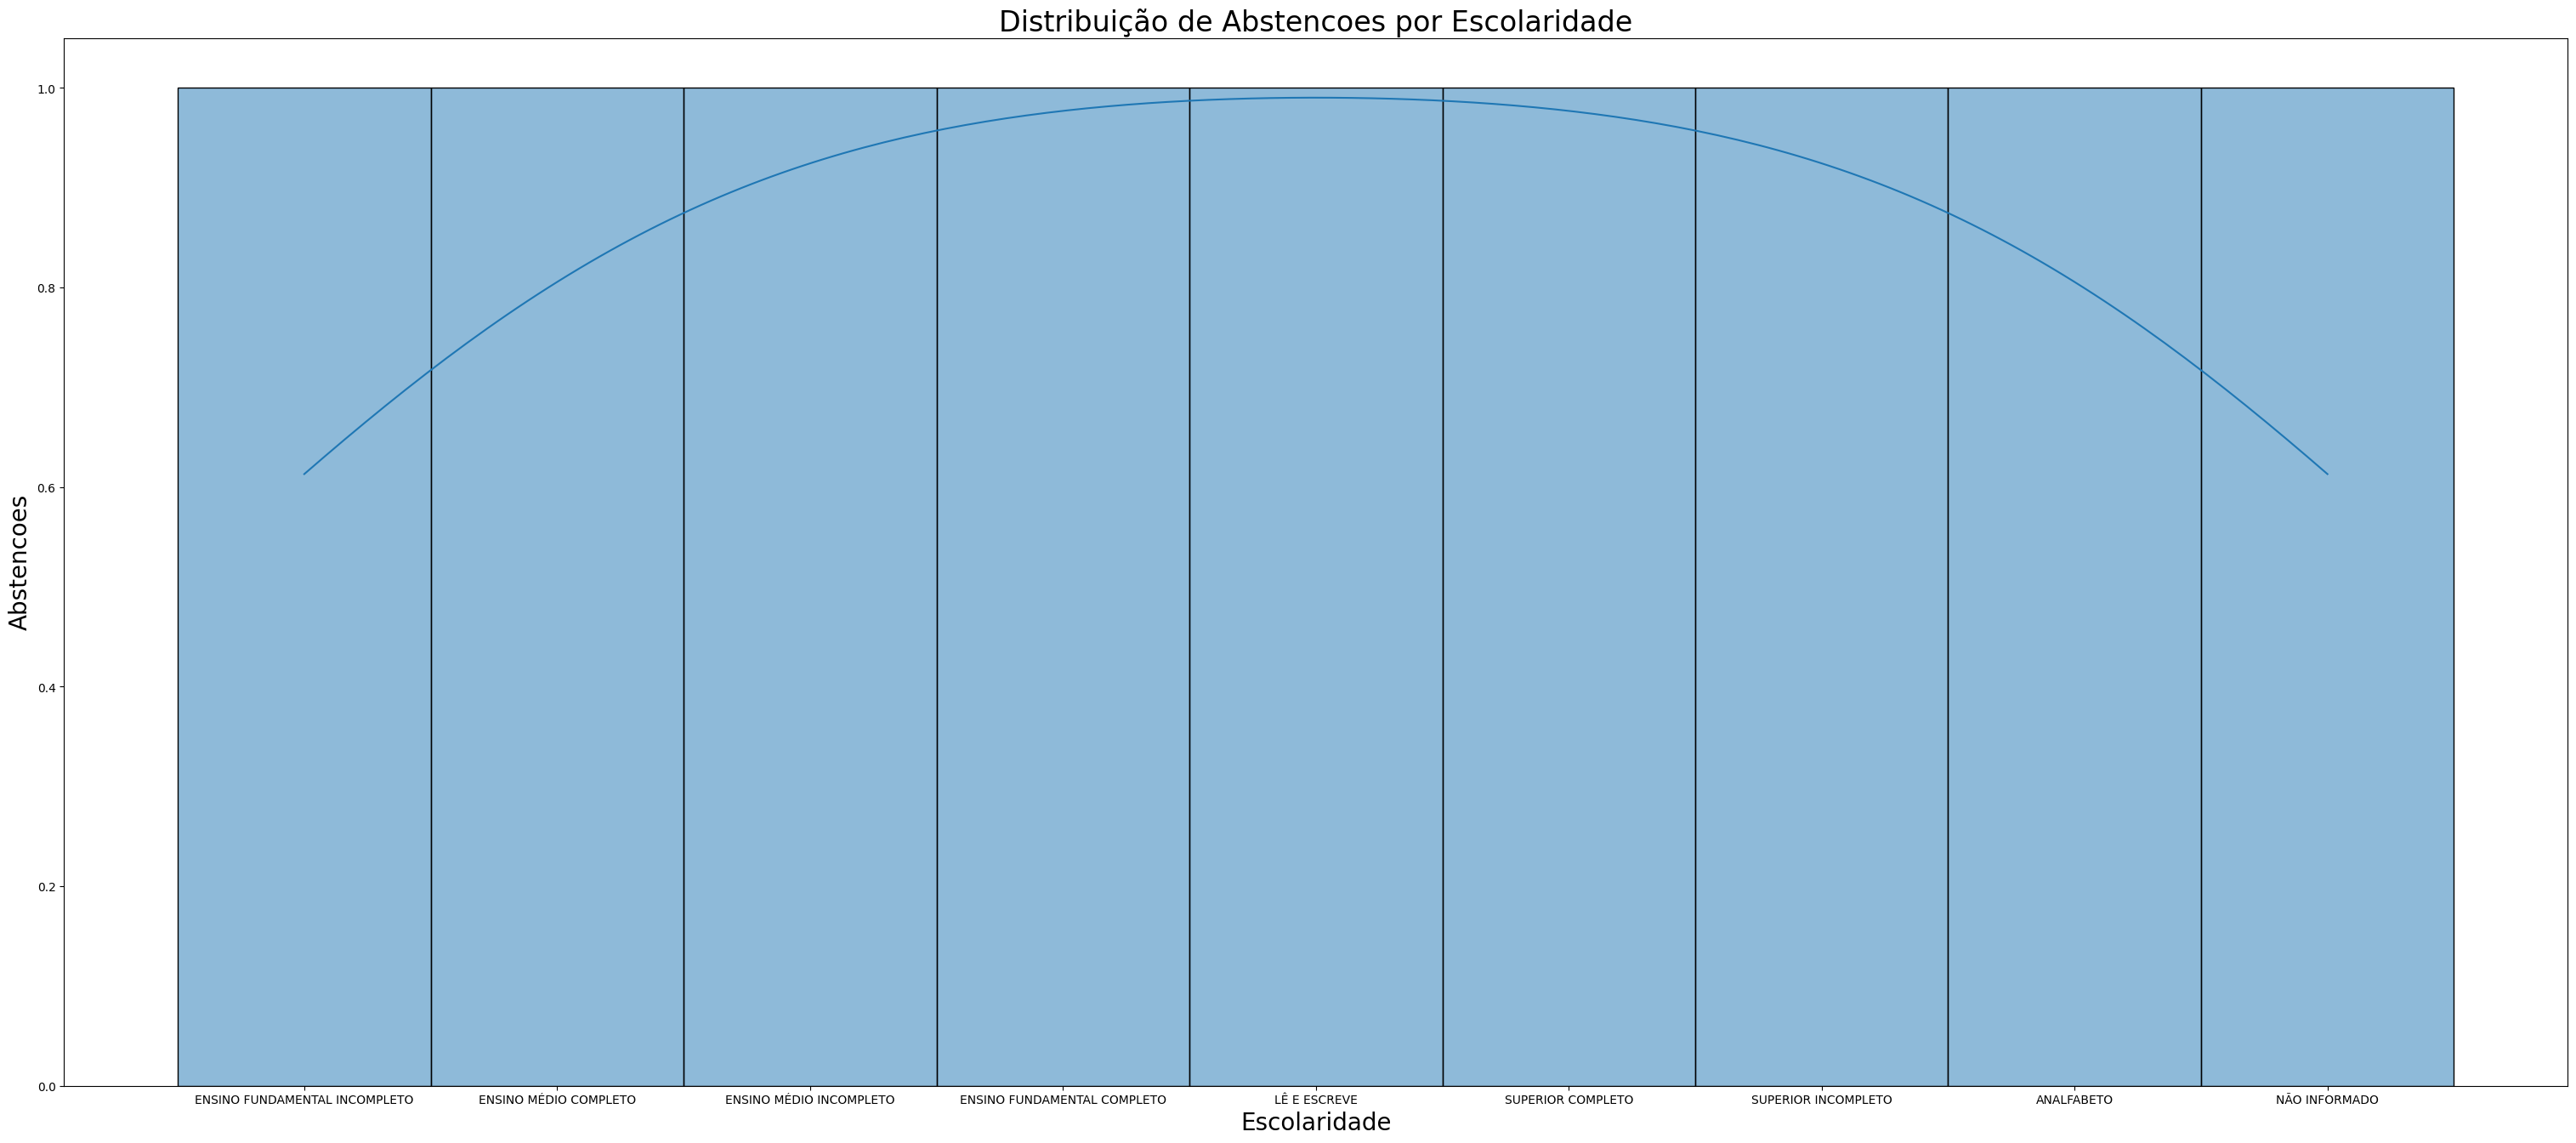

In [48]:
plt.figure(figsize=(38, 16))
# Histograma da abstencao por Escolaridade (um dos atributos)
sns.histplot(df_rj_abstencoes['Grau_escolaridade'], kde=True)
plt.title('Distribuição de Abstencoes por Escolaridade',fontsize=24)
plt.xlabel('Escolaridade',fontsize=20)
plt.ylabel('Abstencoes',fontsize=20)
plt.show()

## Boxplot

Para entender as diferenças entre as escolaridades, devemos olhar como se comportam os valores quando agrupadas. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para cada tipo de Escolaridade, além de visualizar suas distribuições por meio de boxplots.


In [54]:
# Estatísticas descritivas agrupadas por escolaridade
df.groupby('DS_GRAU_ESCOLARIDADE').describe()

ANO_ELEICAO                               \
                                    count    mean  std     min     25%   
DS_GRAU_ESCOLARIDADE                                                     
ANALFABETO                        29357.0  2024.0  0.0  2024.0  2024.0   
ENSINO FUNDAMENTAL COMPLETO       61202.0  2024.0  0.0  2024.0  2024.0   
ENSINO FUNDAMENTAL INCOMPLETO     87889.0  2024.0  0.0  2024.0  2024.0   
ENSINO MÉDIO COMPLETO            106021.0  2024.0  0.0  2024.0  2024.0   
ENSINO MÉDIO INCOMPLETO           79039.0  2024.0  0.0  2024.0  2024.0   
LÊ E ESCREVE                      39467.0  2024.0  0.0  2024.0  2024.0   
NÃO INFORMADO                      4892.0  2024.0  0.0  2024.0  2024.0   
SUPERIOR COMPLETO                 63229.0  2024.0  0.0  2024.0  2024.0   
SUPERIOR INCOMPLETO               48909.0  2024.0  0.0  2024.0  2024.0   

                                                       NR_TURNO            \
                                  50%     75%     max     count      mean   
DS_GRAU_ESCOLARIDADE                                                        
ANALFABETO                     2024.0  2024.0  2024.0   29357.0  1.031372   
ENSINO FUNDAMENTAL COMPLETO    2024.0  2024.0  2024.0   61202.0  1.035048   
ENSINO FUNDAMENTAL INCOMPLETO  2024.0  2024.0  2024.0   87889.0  1.034464   
ENSINO MÉDIO COMPLETO          2024.0  2024.0  2024.0  106021.0  1.036408   
ENSINO MÉDIO INCOMPLETO        2024.0  2024.0  2024.0   79039.0  1.037070   
LÊ E ESCREVE                   2024.0  2024.0  2024.0   39467.0  1.029189   
NÃO INFORMADO                  2024.0  2024.0  2024.0    4892.0  1.018602   
SUPERIOR COMPLETO              2024.0  2024.0  2024.0   63229.0  1.045897   
SUPERIOR INCOMPLETO            2024.0  2024.0  2024.0   48909.0  1.044675   

                               ... QT_COMPAREC_DEFIC_OBRIGATORIO        \
                               ...                           75%   max   
DS_GRAU_ESCOLARIDADE           ...                                       
ANALFABETO                     ...                           0.0   0.0   
ENSINO FUNDAMENTAL COMPLETO    ...                           0.0  16.0   
ENSINO FUNDAMENTAL INCOMPLETO  ...                           0.0  22.0   
ENSINO MÉDIO COMPLETO          ...                           0.0  15.0   
ENSINO MÉDIO INCOMPLETO        ...                           0.0  19.0   
LÊ E ESCREVE                   ...                           0.0  10.0   
NÃO INFORMADO                  ...                           0.0   1.0   
SUPERIOR COMPLETO              ...                           0.0  24.0   
SUPERIOR INCOMPLETO            ...                           0.0   8.0   

                              QT_ABST_DEFIC_OBRIGATORIO                      \
                                                  count      mean       std   
DS_GRAU_ESCOLARIDADE                                                          
ANALFABETO                                      29357.0  0.000000  0.000000   
ENSINO FUNDAMENTAL COMPLETO                     61202.0  0.023463  0.174721   
ENSINO FUNDAMENTAL INCOMPLETO                   87889.0  0.049506  0.287878   
ENSINO MÉDIO COMPLETO                          106021.0  0.032569  0.221903   
ENSINO MÉDIO INCOMPLETO                         79039.0  0.026177  0.196982   
LÊ E ESCREVE                                    39467.0  0.028505  0.189480   
NÃO INFORMADO                                    4892.0  0.000409  0.020217   
SUPERIOR COMPLETO                               63229.0  0.024435  0.187179   
SUPERIOR INCOMPLETO                             48909.0  0.017706  0.146709   

                                                        
                               min  25%  50%  75%  max  
DS_GRAU_ESCOLARIDADE                                    
ANALFABETO                     0.0  0.0  0.0  0.0  0.0  
ENSINO FUNDAMENTAL COMPLETO    0.0  0.0  0.0  0.0  6.0  
ENSINO FUNDAMENTAL INCOMPLETO  0.0  0.0  0.0  0.0  6.0  
ENSINO MÉDIO COMPLETO          0.0  

### Abstencao por escolaridade


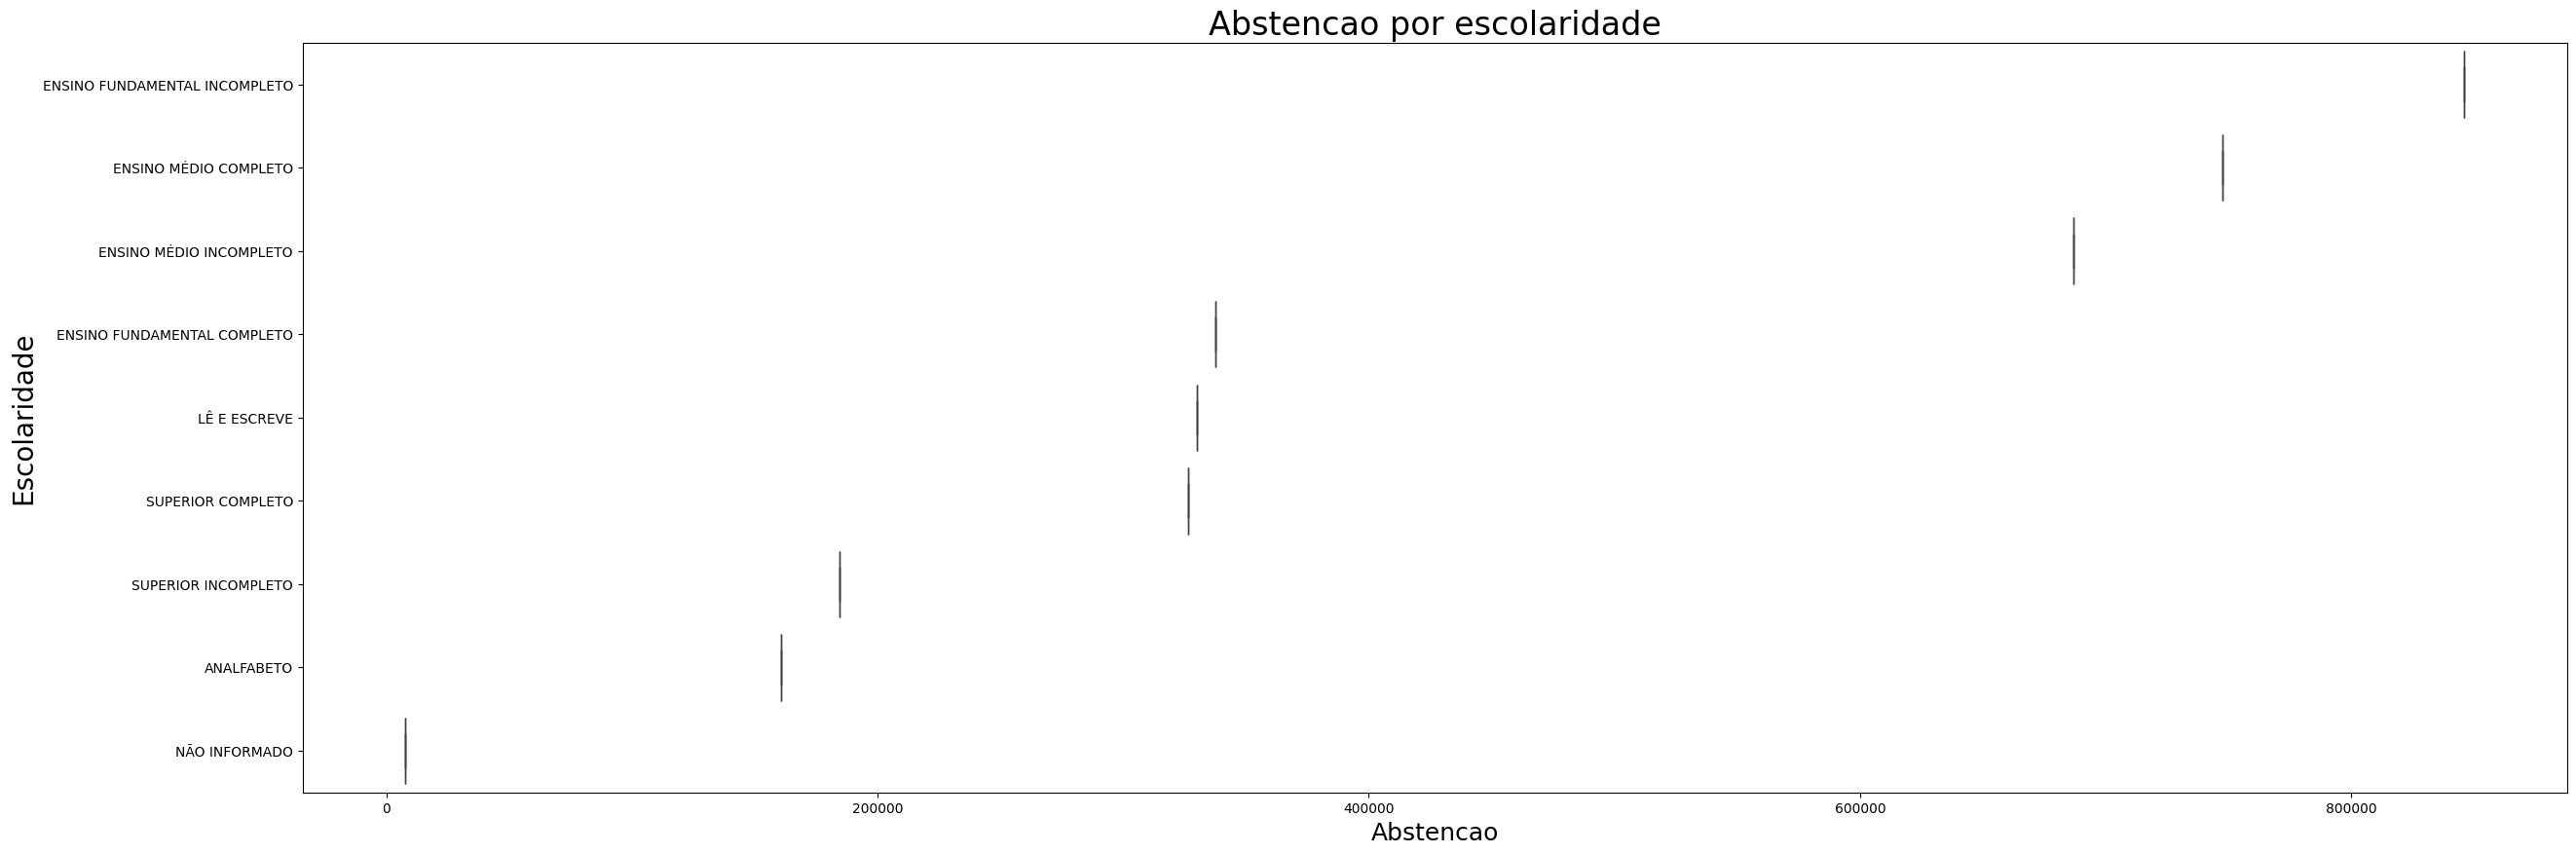

In [55]:
# Boxplot de abstencao por escolaridade
plt.figure(figsize=(30, 10))
sns.boxplot(x='Abstencao', y='Grau_escolaridade', data=df_rj_abstencoes)
plt.title('Abstencao por escolaridade',fontsize=24)
plt.xlabel('Abstencao',fontsize=18)
plt.ylabel('Escolaridade',fontsize=20)
plt.show()

O boxplot da escolariade demonstra que a distribuicao do conjunto de dados nao apresenta simetria

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [56]:
#Atualizando dataframe apenas com registros de Abstencões
df_rj_abstencoes = df_rj[df_rj['QT_ABSTENCAO'] != 0].copy()

                      QT_ABSTENCAO  CD_GRAU_ESCOLARIDADE  CD_FAIXA_ETARIA  \
QT_ABSTENCAO              1.000000              0.015871         0.014592   
CD_GRAU_ESCOLARIDADE      0.015871              1.000000        -0.190895   
CD_FAIXA_ETARIA           0.014592             -0.190895         1.000000   
QT_ABSTENCAO_TTE          0.072501              0.030167        -0.017242   

                      QT_ABSTENCAO_TTE  
QT_ABSTENCAO                  0.072501  
CD_GRAU_ESCOLARIDADE          0.030167  
CD_FAIXA_ETARIA              -0.017242  
QT_ABSTENCAO_TTE              1.000000  


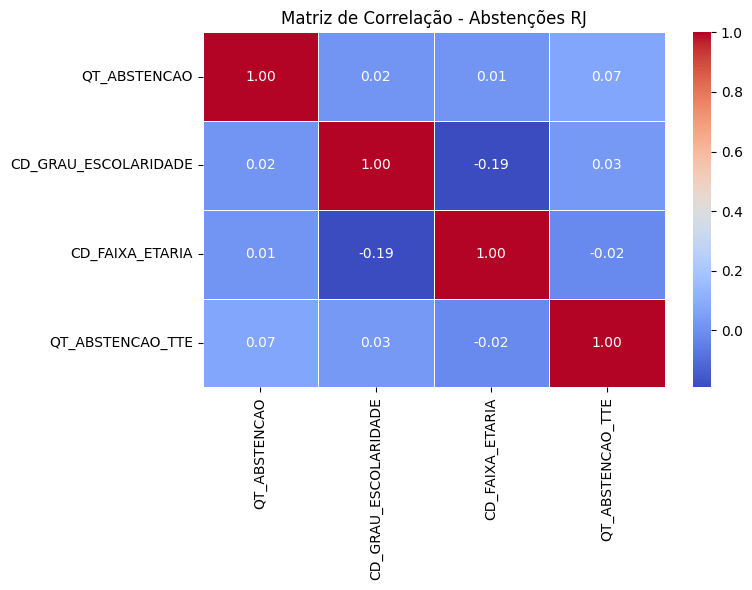

In [57]:
#Matriz de Correlação
# Define as colunas para analisar
colunas_desejadas = ['QT_ABSTENCAO', 'CD_GRAU_ESCOLARIDADE', 'CD_FAIXA_ETARIA', 'QT_ABSTENCAO_TTE']

# Filtra o DataFrame para conter apenas essas colunas
df_filtrado = df_rj_abstencoes[colunas_desejadas]

# Calcula a matriz de correlação
matriz_correlacao = df_filtrado.corr(numeric_only=True)

# Exibe a matriz
print(matriz_correlacao)

# mapa de calor das variáveis numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação - Abstenções RJ")
plt.tight_layout()
plt.show()




O mapa de calor da matriz de correlação revela fortes correlações positivas entre *QT_ABSTENCAO* e *GRAU_ESCOLARIDADE*, bem como entre *FAXIA ETARIA* e *ABSTENCAO_TTE*. Isso sugere que essas características se movem juntas, o que é útil para a seleção de características.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [59]:
# Remover dados invalidos do dataframe
#Dados que nao fazem sentido para a analise dos dados
#Verificar antes de remover
print(df_rj_abstencoes['DS_FAIXA_ETARIA'].unique())
print(df_rj_abstencoes['DS_GRAU_ESCOLARIDADE'].unique())


['80 a 84 anos' '100 anos ou mais' '70 a 74 anos' '75 a 79 anos'
 '95 a 99 anos' '90 a 94 anos' '60 a 64 anos' '65 a 69 anos' '16 anos'
 '17 anos' '18 anos' '19 anos' '20 anos' '21 a 24 anos' '25 a 29 anos'
 '30 a 34 anos' '35 a 39 anos' '40 a 44 anos' '45 a 49 anos'
 '50 a 54 anos' '55 a 59 anos' '85 a 89 anos' 'Inválido']
['ENSINO MÉDIO INCOMPLETO' 'ENSINO MÉDIO COMPLETO' 'LÊ E ESCREVE'
 'ENSINO FUNDAMENTAL COMPLETO' 'ANALFABETO' 'SUPERIOR COMPLETO'
 'ENSINO FUNDAMENTAL INCOMPLETO' 'NÃO INFORMADO' 'SUPERIOR INCOMPLETO']


In [60]:
# Remover dados invalidos do dataframe
# Deletar Faixa Etaria = invalido
# Deletar Grau de Escoloaridade = NAO INFORMADO
#Dados que nao fazem sentido para a analise dos dados
df_rj_abstencoes = df_rj_abstencoes[
    (df_rj_abstencoes['DS_FAIXA_ETARIA'] != 'Inválido') &
    (df_rj_abstencoes['DS_GRAU_ESCOLARIDADE'] != 'NÃO INFORMADO')
].copy()


In [61]:
# Remover dados invalidos do dataframe
#Dados que nao fazem sentido para a analise dos dados
#Verificar depois de remover
print(df_rj_abstencoes['DS_FAIXA_ETARIA'].unique())
print(df_rj_abstencoes['DS_GRAU_ESCOLARIDADE'].unique())

['80 a 84 anos' '100 anos ou mais' '70 a 74 anos' '75 a 79 anos'
 '95 a 99 anos' '90 a 94 anos' '60 a 64 anos' '65 a 69 anos' '16 anos'
 '17 anos' '18 anos' '19 anos' '20 anos' '21 a 24 anos' '25 a 29 anos'
 '30 a 34 anos' '35 a 39 anos' '40 a 44 anos' '45 a 49 anos'
 '50 a 54 anos' '55 a 59 anos' '85 a 89 anos']
['ENSINO MÉDIO INCOMPLETO' 'ENSINO MÉDIO COMPLETO' 'LÊ E ESCREVE'
 'ENSINO FUNDAMENTAL COMPLETO' 'ANALFABETO' 'SUPERIOR COMPLETO'
 'ENSINO FUNDAMENTAL INCOMPLETO' 'SUPERIOR INCOMPLETO']


In [62]:
#Removendo colunas que nao trazem relevancia para o modelo
colunas_para_remover = [
    'DT_GERACAO','HH_GERACAO','CD_ESTADO_CIVIL','CD_GENERO', 'CD_COR_RACA',
    'DS_ESTADO_CIVIL','CD_QUILOMBOLA','DS_QUILOMBOLA','CD_INTERPRETE_LIBRAS',
    'DS_INTERPRETE_LIBRAS','CD_IDENTIDADE_GENERO','DS_IDENTIDADE_GENERO',
    'CD_IDIOMA_INDIGENA','DS_IDIOMA_INDIGENA','CD_GRUPO_INDIGENA',
    'DS_GRUPO_INDIGENA','DS_COR_RACA','DS_GENERO','CD_MUNICIPIO','SG_UF', 'NM_MUNICIPIO',
    'DS_FAIXA_ETARIA', 'DS_GRAU_ESCOLARIDADE'
]

df_rj_abstencoes = df_rj_abstencoes.drop(columns=colunas_para_remover)


In [63]:
#Colunas que serao mantidas no dataframe
print(df_rj_abstencoes.columns)

Index(['ANO_ELEICAO', 'NR_TURNO', 'NR_ZONA', 'CD_FAIXA_ETARIA',
       'CD_GRAU_ESCOLARIDADE', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCAO',
       'QT_COMPARECIMENTO_DEFICIENCIA', 'QT_ABSTENCAO_DEFICIENCIA',
       'QT_COMPARECIMENTO_TTE', 'QT_ABSTENCAO_TTE', 'QT_COMPAREC_FACULTATIVO',
       'QT_ABST_FACULTATIVO', 'QT_COMPAREC_OBRIGATORIO', 'QT_ABST_OBRIGATORIO',
       'QT_COMPAREC_DEFIC_FACULTATIVO', 'QT_ABST_DEFIC_FACULTATIVO',
       'QT_COMPAREC_DEFIC_OBRIGATORIO', 'QT_ABST_DEFIC_OBRIGATORIO'],
      dtype='object')


In [64]:
#mostrando total de instancias para confirmar nao ha perca de dados de abstencoes
print(f"Total de instâncias para o Municipio do Rio de Janeiro: {len(df_rj_abstencoes)}")
print("\nTipos de dados por coluna:")
print(df_rj_abstencoes.info())

Total de instâncias para o Municipio do Rio de Janeiro: 85587

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
Index: 85587 entries, 219244 to 500789
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   ANO_ELEICAO                    85587 non-null  int64
 1   NR_TURNO                       85587 non-null  int64
 2   NR_ZONA                        85587 non-null  int64
 3   CD_FAIXA_ETARIA                85587 non-null  int64
 4   CD_GRAU_ESCOLARIDADE           85587 non-null  int64
 5   QT_APTOS                       85587 non-null  int64
 6   QT_COMPARECIMENTO              85587 non-null  int64
 7   QT_ABSTENCAO                   85587 non-null  int64
 8   QT_COMPARECIMENTO_DEFICIENCIA  85587 non-null  int64
 9   QT_ABSTENCAO_DEFICIENCIA       85587 non-null  int64
 10  QT_COMPARECIMENTO_TTE          85587 non-null  int64
 11  QT_ABSTENCAO_TTE               85587 non-

In [65]:
# Verificando o total de abstenções totalizadas no novo dataset (df_rj) apenas remocao dos dados que nao inconsistentes
total_abstencao_rj = df_rj_abstencoes['QT_ABSTENCAO'].sum()
print(f"Total de abstenções no município do RJ: {total_abstencao_rj}")

Total de abstenções no município do RJ: 1528025


In [66]:
# Aprende min e max APENAS de X_train
# X: todas as colunas exceto a variável alvo
X = df_rj_abstencoes.drop('QT_COMPARECIMENTO', axis=1)

# y: a variável alvo (QT_ABSTENCAO)
y = df_rj_abstencoes['QT_COMPARECIMENTO']


In [67]:
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (85587, 19)
Shape de y: (85587,)


In [68]:

# Divide os dados em 80% treino e 20% teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y,               # features e target
    test_size=0.2,      # 20% para teste
    random_state=42    # garante reprodutibilidade
)

# Verificando os tamanhos
print("Tamanho do conjunto de treino:", X_treino.shape)
print("Tamanho do conjunto de teste:", X_teste.shape)

print(f"Dimensões de y_train: {y_treino.shape}")
print(f"Dimensões de y_test: {y_teste.shape}")


Tamanho do conjunto de treino: (68469, 19)
Tamanho do conjunto de teste: (17118, 19)
Dimensões de y_train: (68469,)
Dimensões de y_test: (17118,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [69]:
# Instancia o scaler
scaler = MinMaxScaler()

# Ajusta (fit) e transforma apenas os dados de treino
X_treino_normalizado = scaler.fit_transform(X_treino)

# Transforma os dados de teste usando os mesmos parâmetros aprendidos do treino
X_teste_normalizado = scaler.transform(X_teste)


In [70]:
# Aprende min e max APENAS de X_treino
scaler.fit(X_treino)
X_train_normalized = scaler.transform(X_treino)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler.transform(X_teste)

In [71]:
# Converte os arrays normalizados de volta para DataFrames
X_treino_normalizado_df = pd.DataFrame(X_train_normalized, columns=X_treino.columns, index=X_treino.index)
X_teste_normalizado_df = pd.DataFrame(X_test_normalized, columns=X_teste.columns, index=X_teste.index)

In [72]:
# Exibe as primeiras 5 linhas do treino normalizado
print(X_treino_normalizado_df.head())

        ANO_ELEICAO  NR_TURNO   NR_ZONA  CD_FAIXA_ETARIA  \
377713          0.0       0.0  0.747934         0.651744   
402728          0.0       0.0  0.487603         0.531492   
491003          0.0       0.0  0.888430         0.892249   
490633          0.0       0.0  0.888430         0.771997   
385061          0.0       0.0  0.929752         0.471366   

        CD_GRAU_ESCOLARIDADE  QT_APTOS  QT_ABSTENCAO  \
377713              1.000000  0.007828      0.011348   
402728              0.714286  0.001010      0.000000   
491003              0.285714  0.000505      0.001418   
490633              0.285714  0.000253      0.000000   
385061              0.714286  0.002020      0.000709   

        QT_COMPARECIMENTO_DEFICIENCIA  QT_ABSTENCAO_DEFICIENCIA  \
377713                           0.04                       0.0   
402728                           0.00                       0.0   
491003                           0.00                       0.0   
490633                           0

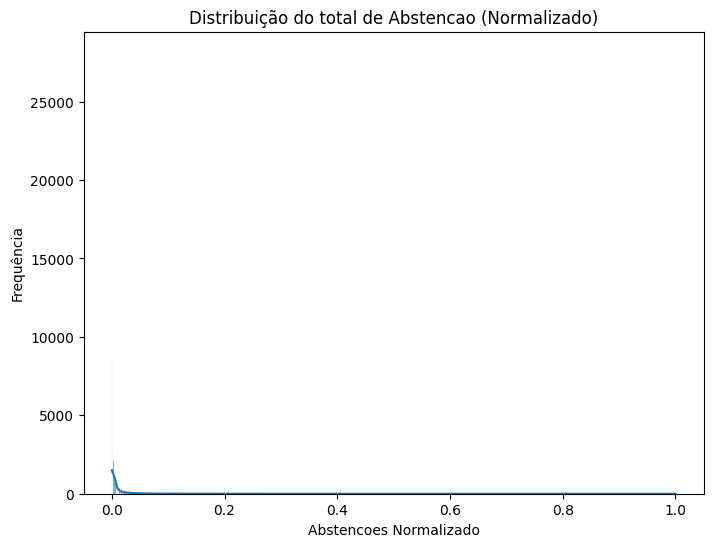

In [74]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(X_treino_normalizado_df['QT_ABSTENCAO'], kde=True)
plt.title('Distribuição do total de Abstencao (Normalizado)')
plt.xlabel('Abstencoes Normalizado')
plt.ylabel('Frequência')
plt.show()

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [75]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [76]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_treino)
X_train_standardized = scaler_std.transform(X_treino)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_teste)

In [77]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_treino.columns)

In [78]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   ANO_ELEICAO  NR_TURNO   NR_ZONA  CD_FAIXA_ETARIA  CD_GRAU_ESCOLARIDADE  \
0          0.0       0.0  0.518586         0.680594              1.564746   
1          0.0       0.0 -0.205333         0.280102              0.592125   
2          0.0       0.0  0.909273         1.481579             -0.866805   
3          0.0       0.0  0.909273         1.081087             -0.866805   
4          0.0       0.0  1.024181         0.079856              0.592125   

   QT_APTOS  QT_ABSTENCAO  QT_COMPARECIMENTO_DEFICIENCIA  \
0 -0.135309     -0.017987                       0.967644   
1 -0.279321     -0.325035                      -0.270302   
2 -0.289989     -0.286654                      -0.270302   
3 -0.295323     -0.325035                      -0.270302   
4 -0.257986     -0.305845                      -0.270302   

   QT_ABSTENCAO_DEFICIENCIA  QT_COMPARECIMENTO_TTE  QT_ABSTENCAO_TTE  \
0                 -0.279872               -0.14778 

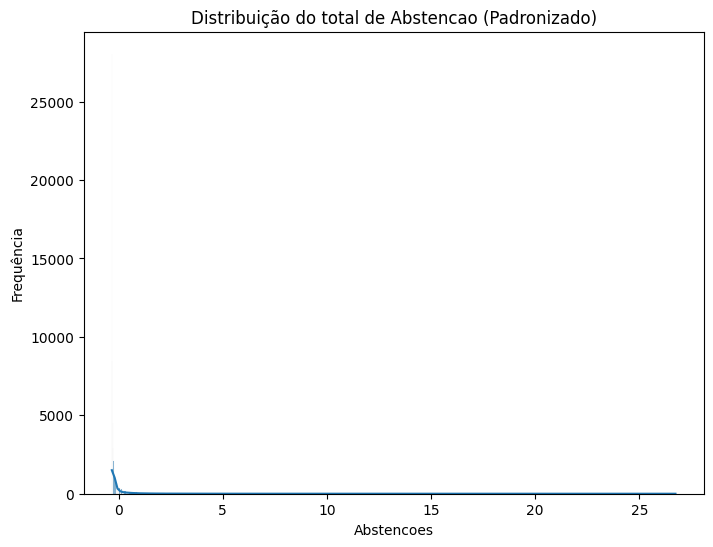

In [79]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['QT_ABSTENCAO'], kde=True)
plt.title('Distribuição do total de Abstencao (Padronizado)')
plt.xlabel('Abstencoes')
plt.ylabel('Frequência')
plt.show()

## Tratamento de Valores Nulos

O dataset Base-TSE original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas. Cono citado houve remocao de algumas linhas cujos valores inputados nao era relacionados aos valores esperados. Outras colunas foram removidas para que uma melhor performance na geracas dos dados de treinamento e testes.

In [80]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Base TSE:")
df.isnull().sum()

Valores nulos no dataset Base TSE:


,0
DT_GERACAO,0
HH_GERACAO,0
ANO_ELEICAO,0
NR_TURNO,0
SG_UF,0
CD_MUNICIPIO,0
NM_MUNICIPIO,0
NR_ZONA,0
CD_GENERO,0
DS_GENERO,0


## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



Acredito que outras etapas nao iriam acrescentar muito para as transformacoes considerando a analise de Abstencoes de eleitores.

# Conclusão

A análise e pré-processamento do dataset BASE-TSE demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset nao é  balanceado, com características numéricas distintas com relaca a Faixa etaria e escolaridade para abstencoes. Foram notadas alguns dados que nao eram relevantes para a analise e que indicam erros na coleta. Estes dados foram removidos antes da definicao dos dados de treino e testes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

Para as três hipóteses levantadas foram identificados o seguinte:

1.   *Existe uma correlação entre faixa etaria do eleitor com quantidade de abstenções?
Pode-se notar que em todas as faixas ha uma quantidade razoavel de abstencoes, porem nao foi possivel detectar uma correlacao grande entre as faixas. Algumas diferencas notadas em classes acima de 70 anos e tambem abaixo de 20 anos, porem nao acho que seja de grande correlacao para determinar uma grande influencia nos resultados.


2.   *Existe uma correlação entre escolaridade do eleitor com quantidade de abstenções?
Nao notei algo de grande relevancia, porem ha algumas observacoes interessantes. Nota-se que o maior nivel de abstencoes por escolaridade esta para eleitores da faixa "Ensino Fundamental incompleto", porem o menor nivel de abstencao esta para eleitores "ANALFABETOS", o que nao pode confirmar uma hipotese de grande ou baixa correlacao.


3.   *Existe uma correlação entre eleitores que mudam de domicilio eleitoral com quantidade de abstenções?
Nao, para esta faixa de amostras a quantidade foi bem baixa, nao indicando haver correlacao de abstencao para aqueles que solicitaram troca de domicilio.
